# Worksheet 06

Name:  Jiang Cheng Liu
UID: U77948366

### Topics

- Kmeans ++
- Hierarchical Clustering

### Kmeans ++

a) What is the difference between K means and K means ++?

K means++ picks centroids randomly based on the probability of how far they are from the other centroids that has been picked so far to avoid picking points close from each other. This is different from K means as it only picks centroids randomly. 

b) What are some limitations of K means ++?

It still assumes that the clusters are spherical which may result in outcomes are not as optimal or does not represent the real world data.

c) Interpret the silhouette plot below. It's a histogram where each bar corresponds to the silhouette score for that data point. Comment on which number of clusters K (2,3,4 or 5) you would choose and why. (the red dotted line is the average silhouette score over the entire dataset).

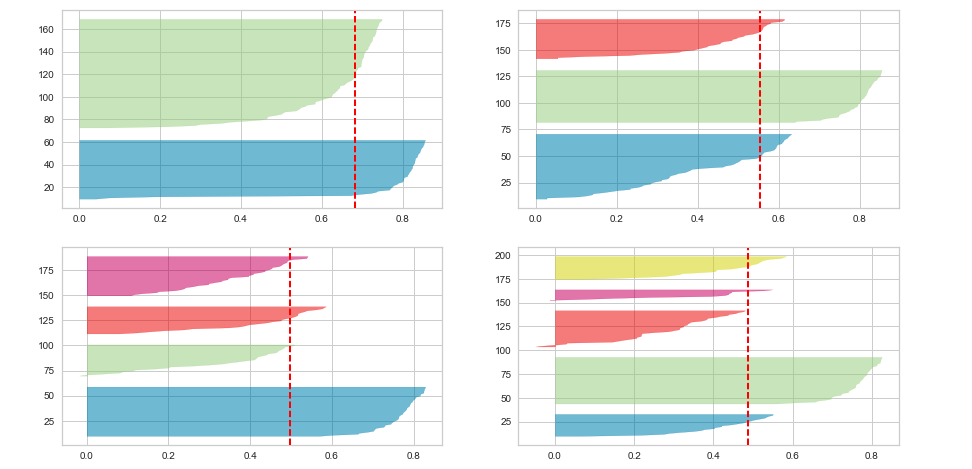

In [ ]:
from IPython.display import Image
Image(filename="silhouette.png", width=500, height=500)

I would choose the first one when K = 2. This is because it has the highest silhoutte score closest to 1 meaning that datapoints are closer to their cluster centers than the others. 

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |1.4| 3 | 1 |2.8|
| B |1.4| 0 |2.2| 1 |1.4|
| C | 3 |2.2| 0 |3.2|2.2|
| D | 1 | 1 |3.2| 0 |2.2|
| E |2.8|1.4|2.2|2.2| 0 |

Step 2

|   | A | BD| C | E |
|---|---|---|---|---|
| A | 0 | 1 | 3 |2.8|
| BD| 1 | 0 |2.2|1.4|
| C | 3 |2.2| 0 |2.2|
| E |2.8|1.4|2.2| 0 |

Step 3

|   |ABD| C | E |
|---|---|---|---|
|ABD| 0 |2.2|1.4|
| C |2.2| 0 |2.2|
| E |1.4|2.2| 0 |

Step 4

|  |ABDE| C|
|---|---|---|
|ABDE| 0 |2.2|
|   C|2.2| 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |1.4| 3 | 1 |2.8|
| B |1.4| 0 |2.2| 1 |1.4|
| C | 3 |2.2| 0 |3.2|2.2|
| D | 1 | 1 |3.2| 0 |2.2|
| E |2.8|1.4|2.2|2.2| 0 |

Step 2

|   | A | B |CD | E |
|---|---|---|---|---|
| A | 0 |1.4| 3 |2.8|
| B |1.4| 0 |2.2|1.4|
| CD|3 |2.2| 0 |2.2|
| E |2.8|1.4|2.2| 0 |

Step 3

|   |CDA| B | E |
|---|---|---|---|
|CDA| 0 |2.2|2.8|
| B |2.2| 0 |1.4|
| E |2.8|1.4| 0 |

Step 4

|   |CDAE| B|
|---|---|---|
|CDAE| 0 |2.2|
| B |2.2| 0 |

## Challenge Problem

### Input:
- Some DNA sequences, each sequence is on a new line. All sequences are of equal length and consist of characters from the set {A, C, G, T}.


### Task:
- Implement a hierarchical clustering algorithm using Hamming distance as the metric clustering DNA sequences.

### Definition of Hamming Distance:

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Mathematically, if we have two strings, $s$ and $t$, of equal length, then the Hamming distance $H(s, t)$ is given by:

$$ H(s, t) = \sum_{i=1}^{n} [s_i \neq t_i] $$

where $n$ is the length of the strings, $s_i$ and $t_i$ are the characters at position $i$ in $s$ and $t$ respectively, and $[s_i \neq t_i]$ is an indicator function, equal to 1 if $s_i \neq t_i$ and 0 otherwise.


### Guidelines:
1. **Read the Dataset**: Choose appropriate data structure.
2. **Compute Hamming Distance**: Implement a function to calculate the Hamming distance between any two sequences.
3. **Hierarchical Clustering**: Apply the hierarchical clustering algorithm using the single-linkage method.
4. **Dendrogram**: Generate a dendrogram to visualize the clustering.
5. **NOTE**: You may use any Python library, but be sure to understand the underlying algorithm.

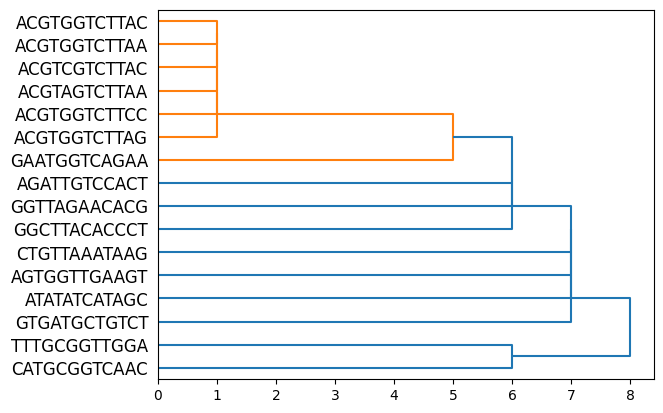

In [3]:
import scipy as sp
import matplotlib.pyplot as plt

sequences = [
 'ACGTGGTCTTAA',
 'ACGTCGTCTTAC',
 'ACGTGGTCTTAC',
 'ACGTAGTCTTAA',
 'ACGTGGTCTTCC',
 'ACGTGGTCTTAG',
 'CTGTTAAATAAG',
 'GGTTAGAACACG',
 'AGTGGTTGAAGT',
 'GGCTTACACCCT',
 'AGATTGTCCACT',
 'CATGCGGTCAAC',
 'ATATATCATAGC',
 'TTTGCGGTTGGA',
 'GAATGGTCAGAA',
 'GTGATGCTGTCT']

def HammingDistance(p, q):
    return sum(1 for a, b in zip(p, q) if a != b)

dist_matrix = [[HammingDistance(p, q) for p in sequences] for q in sequences]

condensed_dist_matrix = sp.spatial.distance.squareform(dist_matrix)

linkage_matrix = sp.cluster.hierarchy.linkage(condensed_dist_matrix, method='single')

dendrogram = sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=sequences, orientation='right')

plt.show()














